# Introduction

H-1B visa

In [1]:
# Import libraries and check the versions
import pandas as pd
import sys
import numpy as np
import sklearn
import matplotlib as mpl
import seaborn as sns
import missingno as msno

print('Python version: {}'.format(sys.version))
print('Numpy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('Matplotlib version {}'.format(mpl.__version__))
print('Seaborn version {}'.format(sns.__version__))
print('Sklearn version: {}'.format(sklearn.__version__))
print('Missingno version: {}'.format(msno.__version__))

# Pretty display for notebooks
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# for more clear plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Python version: 3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy version 1.14.0
Pandas version 0.20.3
Matplotlib version 2.1.2
Seaborn version 0.8.0
Sklearn version: 0.19.1
Missingno version: 0.3.5


### 1. Data Collection

This dataset can be found at kaggle's website. First column of the dataset is the index column and we specify that with index_col = 0. Let's see the first five records of the dataset.

In [2]:
# retrieve the data
df = pd.read_csv('h1b_kaggle.csv', index_col=0)
df.head()

/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


### 2. Data Wrangling

Before we do explonatary data analysis, we need to select necessary features and clean the data. 

In [3]:
# select the features that will be used creating the model
data = df[['CASE_STATUS', 'SOC_NAME',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'WORKSITE']]

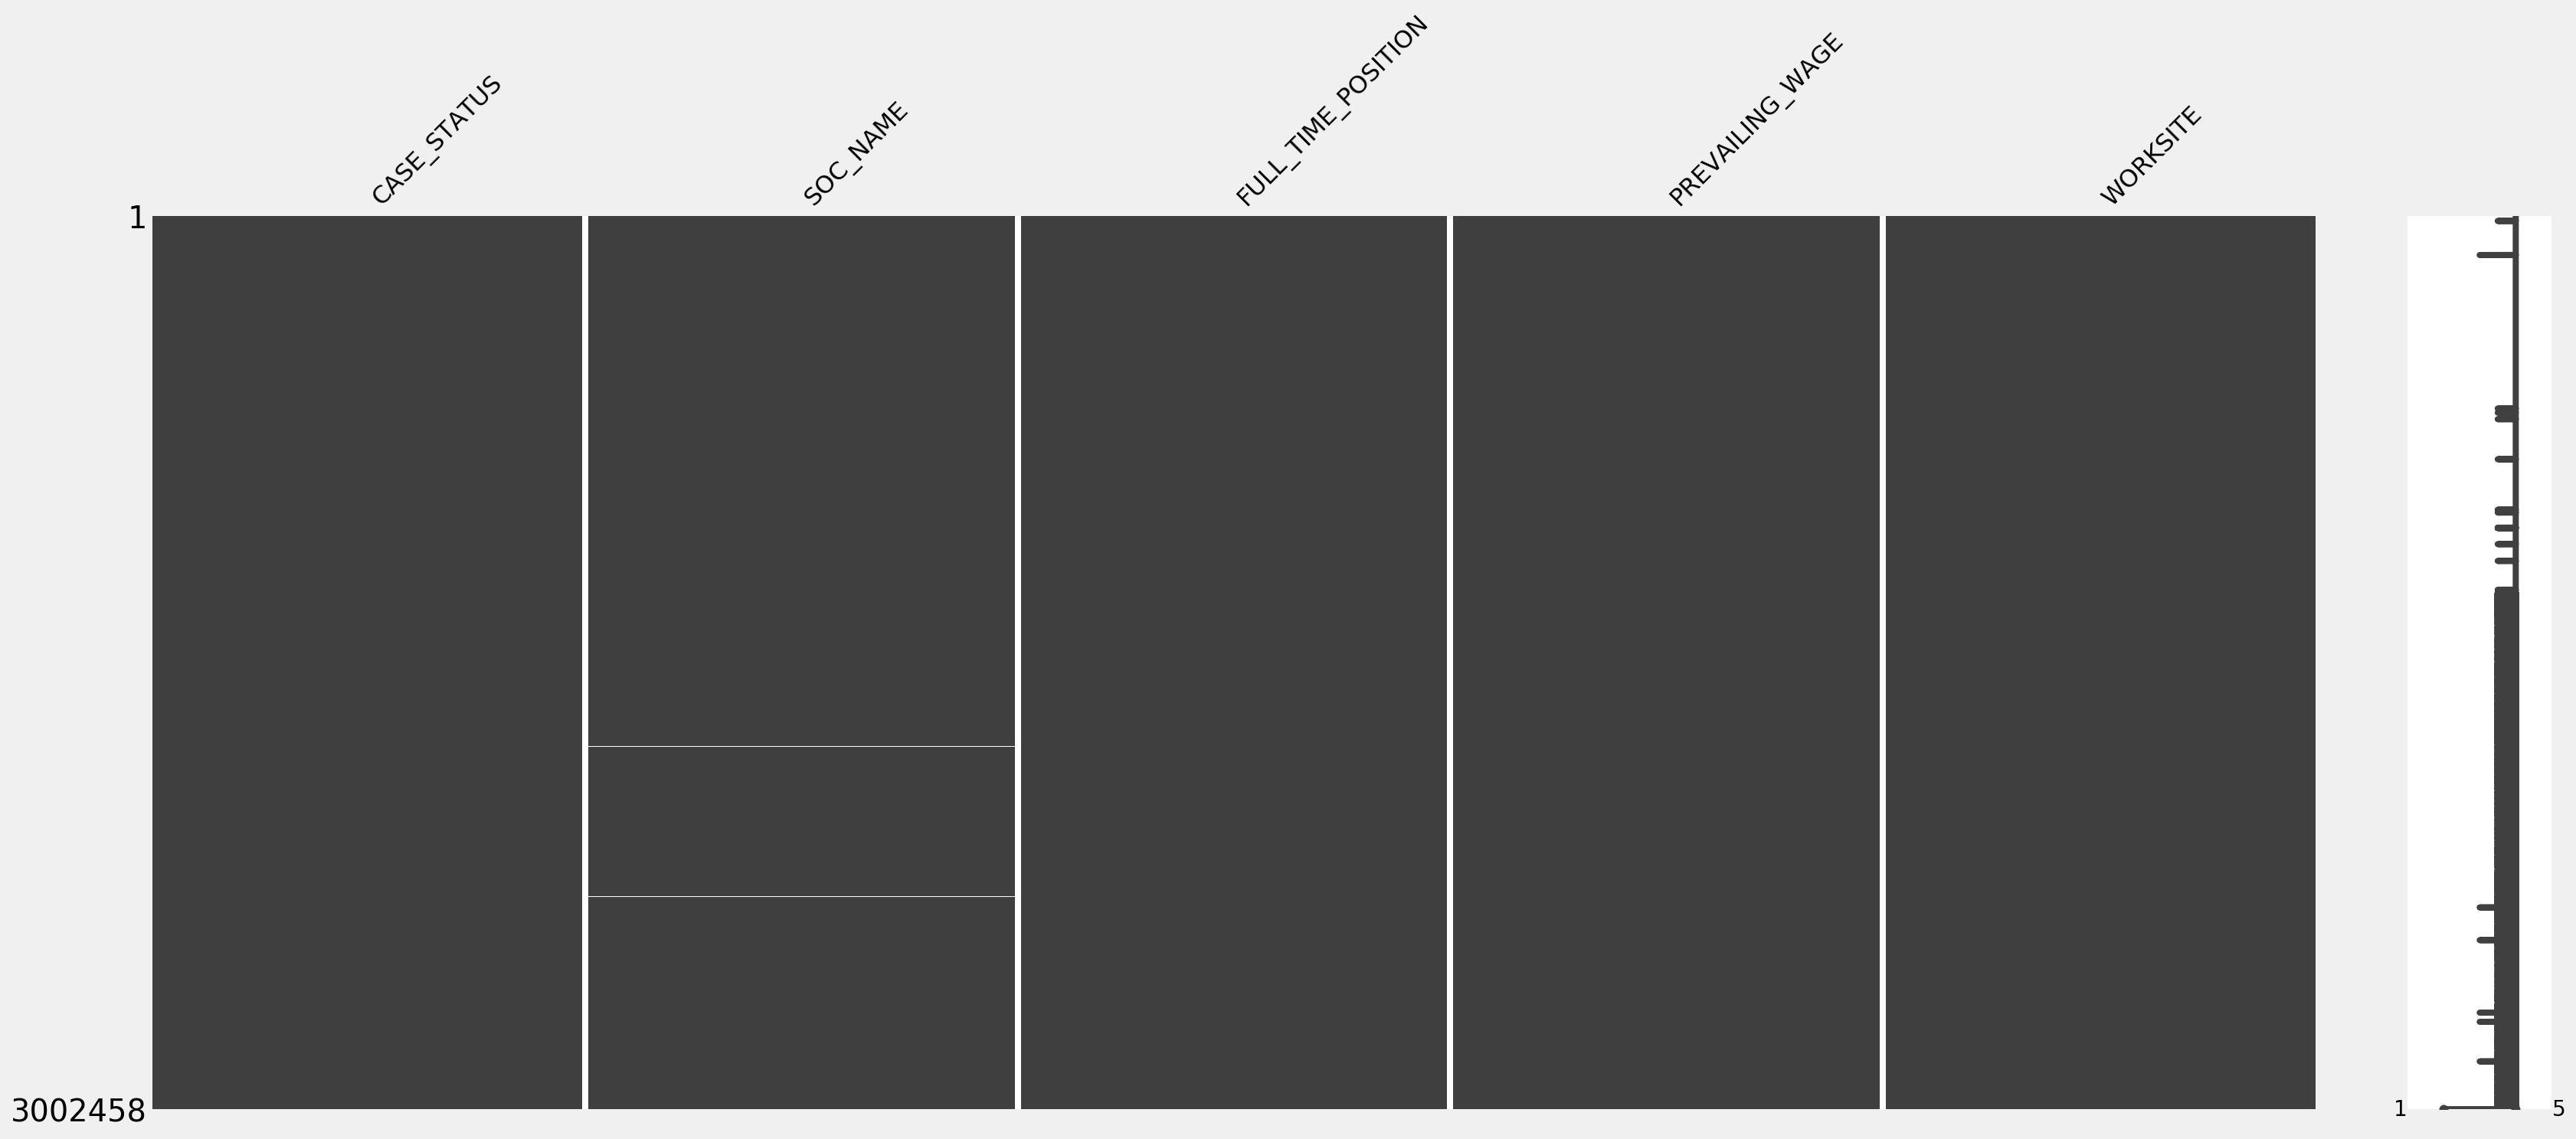

In [4]:
# missing values
msno.matrix(data)

In [5]:
#check the missing data
data.isnull().sum()

CASE_STATUS              13
SOC_NAME              17734
FULL_TIME_POSITION       15
PREVAILING_WAGE          85
WORKSITE                  0
dtype: int64

In [6]:
# remove the missing values
data = data.dropna()

In [7]:
# number of records in the dataset
data.shape

(2984656, 5)

In [8]:
# type of columns
data.dtypes

CASE_STATUS            object
SOC_NAME               object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
WORKSITE               object
dtype: object

In [9]:
# convert all strings to uppercase 
data['SOC_NAME'] = data['SOC_NAME'].str.upper()

In [10]:
# remove city names from worksite column
data['WORKSITE'] = data['WORKSITE'].apply(lambda x: x.split(', ')[1])

In [11]:
data['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

There are seven types of case statues but only the "CERTIFIED" have a positive result. 

In [12]:
data['CASE_STATUS'] = data['CASE_STATUS'].apply(lambda x: 1 if x == 'CERTIFIED' else 0)

### 3. Data Exploring

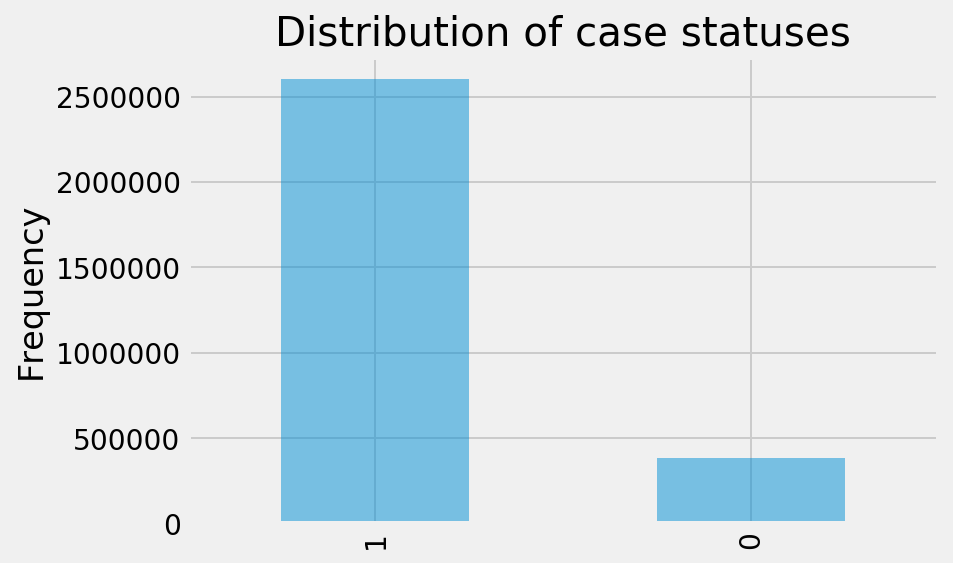

In [57]:
data['CASE_STATUS'].value_counts().plot(kind='bar', alpha=0.5)
plt.title('Distribution of case statuses')
plt.ylabel('Frequency');

In [14]:
# number of unique values in each column
for column in data:
    print(column, data[column].nunique())   

CASE_STATUS 2
SOC_NAME 1584
FULL_TIME_POSITION 2
PREVAILING_WAGE 56000
WORKSITE 53


There are 1584 different job titles in the dataset. Position type is either full time or not full time. Wage is a continuos value 

In [16]:
data.head()

,CASE_STATUS,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE
1,0,BIOCHEMISTS AND BIOPHYSICISTS,N,36067.0,MICHIGAN
2,0,CHIEF EXECUTIVES,Y,242674.0,TEXAS
3,0,CHIEF EXECUTIVES,Y,193066.0,NEW JERSEY
4,0,CHIEF EXECUTIVES,Y,220314.0,COLORADO
5,0,CHIEF EXECUTIVES,Y,157518.4,MISSOURI


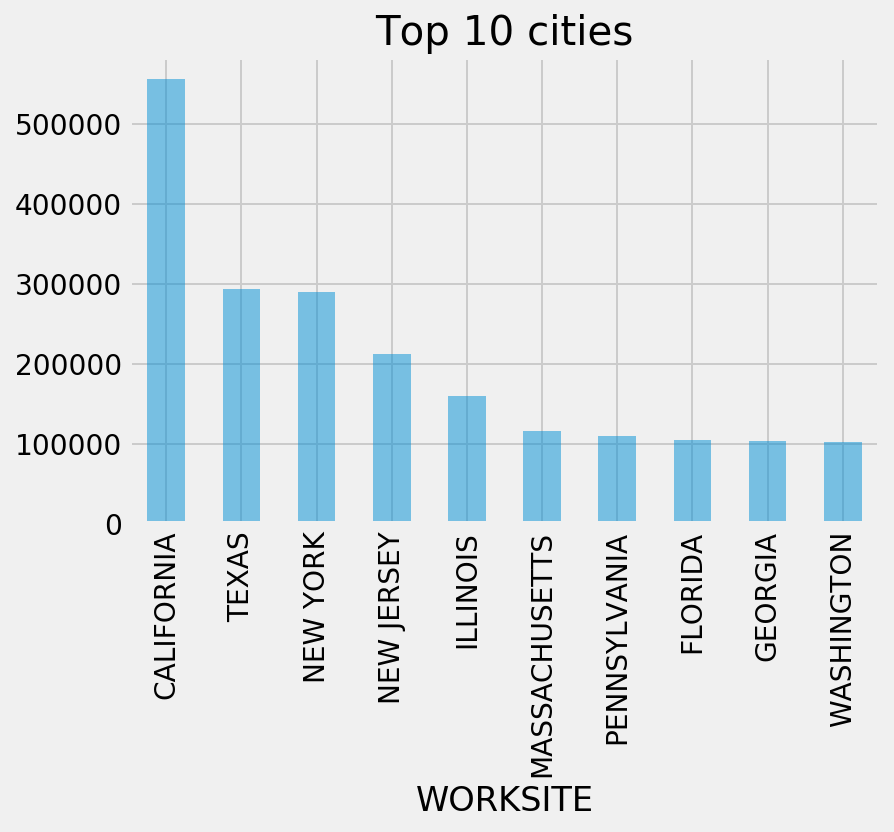

In [59]:
data['WORKSITE'].groupby(data['WORKSITE']).count()\
                .sort_values(ascending=False).head(10).plot(kind='bar', alpha=0.5)
plt.title('Top 10 cities');

(array([ 426218.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2558438.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

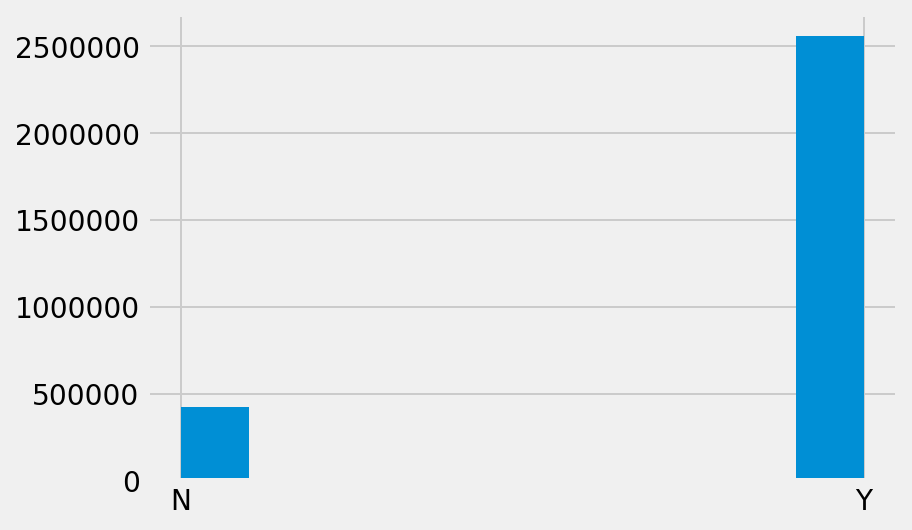

In [60]:
plt.hist(data['FULL_TIME_POSITION']);

In [ ]:
plt.scatter(data['FULL_TIME_POSITION'], data['FULL_TIME_POSITION'])

### 4. Data Transforming

### 5. Data Modeling

### 6. 